In [1]:
import nltk
import pandas as pd
import nltk.classify
import nltk.corpus
from nltk.corpus import stopwords
import yellowbrick
import os
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from nltk import FreqDist
import numpy as np
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import sentence_polarity
from nltk.collocations import *
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('C://Users//Damon//OneDrive//NLP')

In [2]:
df = pd.read_csv('Sarcasm Data.csv')

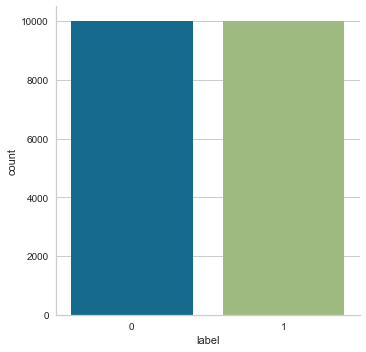

In [3]:
sns.catplot(data = df, kind = 'count', x='label')

In [5]:
df.head(10)

,ID,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,1,But they'll have all those reviews!,RoguishPoppet,ProductTesting,0,-1,-1,2016-11,11/1/2016 2:04,"The dumb thing is, they are risking their sell..."
1,2,1,wow it is totally unreasonable to assume that ...,pb2crazy,politics,2,-1,-1,2016-11,11/1/2016 2:42,Clinton campaign accuses FBI of 'blatant doubl...
2,3,1,Ho ho ho... But Melania said that there is no ...,pb2crazy,politics,8,-1,-1,2016-10,10/18/2016 16:20,Anyone else think that it was interesting the ...
3,4,1,I can't wait until @potus starts a twitter war...,kitduncan,politics,3,-1,-1,2016-11,11/1/2016 3:22,Here's what happens when Obama gives up his Tw...
4,5,1,gotta love the teachers who give exams on the ...,DEP61,CFBOffTopic,3,-1,-1,2016-11,11/1/2016 3:30,Monday night Drinking thread Brought to You by...
5,6,1,"Hoiberg said ""great players"", not Dwight",deezee72,nba,29,-1,-1,2016-11,11/1/2016 3:45,except the 2012 lakers
6,7,1,"Oh, I never realized it was so easy, why had I...",SatanicBeaver,AskReddit,1,-1,-1,2016-11,11/1/2016 3:51,A little self lovin can turn that 99 into a 10...
7,8,1,"Exactly, no reason whatsoever.",Bifi323,oddlysatisfying,1,-1,-1,2016-11,11/1/2016 9:59,To make predators think they're poisonous?
8,9,1,Hank would have a great time in the Legends of...,CIearMind,supergirlTV,3,-1,-1,2016-11,11/1/2016 10:23,Pretty inconvenient if they landed anywhere pr...
9,10,1,I remember reading all of those stories in the...,MiggidyMacDewi,videos,1,-1,-1,2016-11,11/1/2016 12:03,You as everyone else are MISSING THE ENTIRE PO...


The following 3 blocks convert the dataframe to a corupus. 

In [7]:
def CreateCorpusFromDataFrame(corpusfolder,df):
    for index, r in df.iterrows():
        id=r['ID']
        body=r['comment']
        category=r['label']
        fname=str(category)+'_'+str(id)+'.txt'
        corpusfile=open(corpusfolder+'/'+fname,'a')
        corpusfile.write(str(body))
        corpusfile.close()


Please create a new path that points to a local directory on your machine. While the corpus contains 20000 records, it is only 6mb

In [89]:
CreateCorpusFromDataFrame('C://Users//Damon//OneDrive//NLP//Corpus',df)

NameError: name 'CreateCorpusFromDataFrame' is not defined

In [4]:
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
my_corpus=CategorizedPlaintextCorpusReader('C://Users//Damon//OneDrive//NLP//Corpus',
r'.*', cat_pattern=r'(.*)_.*') 

In [5]:
my_corpus.categories() 

['0', '1']

In [6]:
documents = [(sent, cat) for cat in my_corpus.categories() 
    for sent in my_corpus.sents(categories=cat)]
random.shuffle(documents)

In [11]:
sarcasticSents = my_corpus.sents(categories= '1')
print(len(sarcasticSents))
nonsarcasticSents = my_corpus.sents(categories= '0')
print(len(nonsarcasticSents))

26529
28542


In [7]:
all_words_list = [word.lower() for (sent,cat) in documents for word in sent]
all_words  = nltk.FreqDist(all_words_list)
word_items = all_words.most_common(1500)
word_features = [word for (word, freq) in word_items]

In [13]:
print(word_features[:50])

['the', "'", '.', ',', 'a', 'to', 'you', 'i', 'and', 'it', 'is', 'that', 's', 'of', 't', '?', 'in', 'for', '!', '-', 'this', 'they', 'be', '"', 'have', 'on', 'are', 'but', 'he', 'just', 'not', 'with', 'was', '...', 'so', 'like', 'can', 'all', 'if', 'we', 'as', 'at', 'your', 'because', 'my', 'would', 'trump', 're', 'people', 'what']


In [9]:
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    return features


In [10]:
featuresets = [(document_features(d,word_features), c) for (d,c) in documents]

In [16]:
print(len(featuresets))

55071


In [17]:
train_set, test_set = featuresets[49600:], featuresets[:49600]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(classifier, test_set))


0.626875


In [18]:
classifier.show_most_informative_features(10)

Most Informative Features
                  V_kids = True                1 : 0      =     14.1 : 1.0
                  V_jobs = True                1 : 0      =      9.1 : 1.0
               V_dropped = True                1 : 0      =      8.3 : 1.0
               V_totally = True                1 : 0      =      8.1 : 1.0
             V_reference = True                0 : 1      =      7.7 : 1.0
                 V_close = True                0 : 1      =      7.7 : 1.0
               V_picture = True                1 : 0      =      7.6 : 1.0
                   V_ass = True                0 : 1      =      6.4 : 1.0
              V_possible = True                0 : 1      =      6.4 : 1.0
               V_usually = True                0 : 1      =      6.4 : 1.0


In [53]:
def cross_validation(num_folds, featuresets):
    subset_size = len(featuresets)//num_folds
    accuracy_list = []
    # iterate over the folds
    for i in range(num_folds):
        test_this_round = featuresets[i*subset_size:][:subset_size]
        train_this_round = featuresets[:i*subset_size]+featuresets[(i+1)*subset_size:]
            # train using train_this_round
        classifier = nltk.NaiveBayesClassifier.train(train_this_round)
# evaluate against test_this_round and save accuracy
        accuracy_this_round = nltk.classify.accuracy(classifier, test_this_round)
        print (i, accuracy_this_round)
        accuracy_list.append(accuracy_this_round)
    # find mean accuracy over all rounds
    print ('mean accuracy', sum(accuracy_list) / num_folds)


In [94]:
cross_validation(3, featuresets)

0 0.6518494307348696
1 0.6607833523996296
2 0.658386446587133
mean accuracy 0.6570064099072107


18357.0

In [96]:
goldlist = []
predictedlist = []
for (features, label) in test_set:
    goldlist.append(label)
    predictedlist.append(classifier.classify(features))


In [99]:
cm = nltk.ConfusionMatrix(goldlist, predictedlist)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

  |      0      1 |
--+---------------+
0 | <33.4%> 18.5% |
1 |  17.7% <30.4%>|
--+---------------+
(row = reference; col = test)



In [54]:
def eval_measures(gold, predicted):
    # get a list of labels
    labels = list(set(gold))
    # these lists have values for each label 
    recall_list = []
    precision_list = []
    F1_list = []
    for lab in labels:
        # for each label, compare gold and predicted lists and compute values
        TP = FP = FN = TN = 0
        for i, val in enumerate(gold):
            if val == lab and predicted[i] == lab:  TP += 1
            if val == lab and predicted[i] != lab:  FN += 1
            if val != lab and predicted[i] == lab:  FP += 1
            if val != lab and predicted[i] != lab:  TN += 1
        # use these to compute recall, precision, F1
        recall = TP / (TP + FP)
        precision = TP / (TP + FN)
        recall_list.append(recall)
        precision_list.append(precision)
        F1_list.append( 2 * (recall * precision) / (recall + precision))

    # the evaluation measures in a table with one row per label
    print('\tPrecision\tRecall\t\tF1')
    # print measures for each label
    for i, lab in enumerate(labels):
        print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
          "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))


In [100]:
eval_measures(goldlist, predictedlist)

	Precision	Recall		F1
0 	      0.644      0.653      0.649
1 	      0.632      0.622      0.627


Adding Stopwords and Lemmatizing

In [11]:
## Remove stop words
# Add Lemmatizer
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [101]:
0## Remove stop words
stopWords = set(stopwords.words('english'))
all_words_list = [lemmatizer.lemmatize(word.lower()) for (sent,cat) in documents for word in sent if word not in stopWords]
all_words  = nltk.FreqDist(all_words_list)
word_items = all_words.most_common(1500)
word_features = [word for (word, freq) in word_items]


In [102]:
print(word_features[:50])

["'", '.', ',', 'i', '?', '!', '-', '"', '...', 'like', 'get', 'trump', 'would', 'people', 'one', '*', 'know', 'make', 'think', 'right', 'donald', 'game', 'good', 'time', 'dump', 'tronald', '/', ':', 'really', 'need', 'sure', 'well', 'thing', 'mean', 'see', 'want', 'could', 'guy', 'yeah', 'go', 'year', 'you', 'way', 'much', 'the', 'better', 'even', 'man', 'look', 'never']


In [22]:
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    return features


In [23]:
secondfeaturesets = [(document_features(d,word_features), c) for (d,c) in documents]

In [24]:
train_set, test_set = secondfeaturesets[49600:], secondfeaturesets[:49600]
secondClassifier = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(secondClassifier, test_set))

0.5952016129032258


In [25]:
secondClassifier.show_most_informative_features(10)

Most Informative Features
                   V_men = True                1 : 0      =      8.7 : 1.0
                V_number = True                0 : 1      =      7.9 : 1.0
                 V_haven = True                0 : 1      =      7.9 : 1.0
                 V_water = True                0 : 1      =      7.9 : 1.0
               V_totally = True                1 : 0      =      7.3 : 1.0
                V_friend = True                0 : 1      =      7.3 : 1.0
                 V_these = True                1 : 0      =      6.6 : 1.0
                  V_save = True                1 : 0      =      6.6 : 1.0
                  V_lazy = True                1 : 0      =      6.6 : 1.0
             V_obviously = True                1 : 0      =      6.1 : 1.0


In [26]:
cross_validation(3, secondfeaturesets)

0 0.6233044615133192
1 0.626899820232064
2 0.6286430244593343
mean accuracy 0.6262824354015725


In [27]:
goldlist = []
predictedlist = []
for (features, label) in test_set:
    goldlist.append(label)
    predictedlist.append(secondClassifier.classify(features))
cm = nltk.ConfusionMatrix(goldlist, predictedlist)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

  |      0      1 |
--+---------------+
0 | <27.3%> 24.6% |
1 |  15.9% <32.2%>|
--+---------------+
(row = reference; col = test)



In [28]:
eval_measures(goldlist, predictedlist)

	Precision	Recall		F1
1 	      0.669      0.567      0.614
0 	      0.527      0.632      0.575


Bigrams & Trigrams

In [67]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [64]:
dictWord = set(nltk.corpus.words.words())
all_words_list = [word.lower() for (sent,cat) in documents for word in sent if word in dictWord]
all_words  = nltk.FreqDist(all_words_list)
word_items = all_words.most_common(1500)
word_features = [word for (word, freq) in word_items]


In [65]:
finder = BigramCollocationFinder.from_words(all_words_list)
triFinder = TrigramCollocationFinder.from_words(all_words_list)

In [68]:
bigram_features = finder.nbest(bigram_measures.pmi,500)
trigram_features = triFinder.nbest(trigram_measures.pmi,250)

In [85]:
def bigram_document_features(document,word_features, bigram_features):
    document_words = set(document)
    document_bigrams = nltk.bigrams(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    for bigram in bigram_features:
        features['B_{}_{}'.format(bigram[0], bigram[1])] = (bigram in document_bigrams)    
    return features


In [82]:
bifeaturesets = [(bigram_document_features(d,word_features, bigram_features), c) for (d,c) in documents]

In [83]:
bitrain_set, bitest_set = bifeaturesets[49200:], bifeaturesets[:49200]
biclassifier = nltk.NaiveBayesClassifier.train(bitest_set)
print (nltk.classify.accuracy(biclassifier, bitest_set))

0.5172357723577236


In [84]:
biclassifier.show_most_informative_features(10)

Most Informative Features
   B_morbid_apprehension = False               1 : 0      =      1.0 : 1.0
   B_commissioner_gordon = False               1 : 0      =      1.0 : 1.0
            B_spelt_duck = False               1 : 0      =      1.0 : 1.0
       B_tread_patterned = False               1 : 0      =      1.0 : 1.0
         B_horrific_pose = False               1 : 0      =      1.0 : 1.0
     B_childish_childish = False               1 : 0      =      1.0 : 1.0
B_universally_unconstitutional = False               1 : 0      =      1.0 : 1.0
      B_strategic_bomber = False               1 : 0      =      1.0 : 1.0
           B_vista_brick = False               1 : 0      =      1.0 : 1.0
 B_typically_solipsistic = False               1 : 0      =      1.0 : 1.0


In [73]:
cross_validation(3, bifeaturesets)

0 0.6239036879664434
1 0.6234678869096257
2 0.6293512011766629
mean accuracy 0.625574258684244


In [74]:
goldlist = []
predictedlist = []
for (features, label) in test_set:
    goldlist.append(label)
    predictedlist.append(biclassifier.classify(features))
cm = nltk.ConfusionMatrix(goldlist, predictedlist)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

  |      0      1 |
--+---------------+
0 | <27.5%> 24.2% |
1 |  15.8% <32.4%>|
--+---------------+
(row = reference; col = test)



In [75]:
eval_measures(goldlist, predictedlist)

	Precision	Recall		F1
0 	      0.532      0.635      0.579
1 	      0.672      0.572      0.618


In [76]:
def trigram_document_features(document,word_features, bigram_features, trigram_features):
    document_words = set(document)
    document_bigrams = nltk.bigrams(document)
    document_trigram = nltk.trigrams(document)
    features = {}
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    for bigram in bigram_features:
        features['B_{}_{}'.format(bigram[0], bigram[1])] = (bigram in document_bigrams)    
    for trigram in trigram_features:
         features['T_{}_{}_{}'.format(trigram[0], trigram[1], trigram[2])] = (trigram in document_trigram)    
    return features

In [77]:
trifeaturesets = [(trigram_document_features(d, word_features, bigram_features,trigram_features), c) for (d,c) in documents]

In [79]:
train_set, test_set = trifeaturesets[49200:], trifeaturesets[:49200]
triclassifier = nltk.NaiveBayesClassifier.train(train_set)
print (nltk.classify.accuracy(triclassifier, test_set))

0.599390243902439


In [80]:
triclassifier.show_most_informative_features(10)

Most Informative Features
             V_obviously = True                1 : 0      =      8.8 : 1.0
                   V_may = True                0 : 1      =      8.1 : 1.0
                   V_per = True                1 : 0      =      7.8 : 1.0
               V_similar = True                0 : 1      =      6.9 : 1.0
                 V_small = True                0 : 1      =      6.6 : 1.0
                   V_ass = True                0 : 1      =      6.3 : 1.0
                  V_near = True                0 : 1      =      6.3 : 1.0
                 V_night = True                0 : 1      =      6.3 : 1.0
              V_campaign = True                0 : 1      =      6.3 : 1.0
                 V_under = True                0 : 1      =      6.3 : 1.0


In [37]:
cross_validation(3, trifeaturesets)

0 0.6233044615133192
1 0.626899820232064
2 0.6286430244593343
mean accuracy 0.6262824354015725


In [38]:
goldlist = []
predictedlist = []
for (features, label) in test_set:
    goldlist.append(label)
    predictedlist.append(triclassifier.classify(features))
cm = nltk.ConfusionMatrix(goldlist, predictedlist)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

  |      0      1 |
--+---------------+
0 | <27.2%> 24.7% |
1 |  15.7% <32.4%>|
--+---------------+
(row = reference; col = test)



In [39]:
eval_measures(goldlist, predictedlist)

	Precision	Recall		F1
1 	      0.673      0.567      0.616
0 	      0.524      0.634      0.574


Additional classifiers

In [11]:
newClassFeatureSets = featuresets

In [88]:
train_set, test_set = newClassFeatureSets[49200:], newClassFeatureSets[:49200]
classifier = nltk.DecisionTreeClassifier.train(train_set, binary=True, entropy_cutoff=0.8, depth_cutoff=5, support_cutoff=30)



In [16]:
print(nltk.classify.accuracy(classifier, test_set))
print(classifier)

0.5905284552845529
V_!=False? ............................................ 0
  V_because=False? .................................... 0
    V_obviously=False? ................................ 0
      V_all=False? .................................... 0
      else: ........................................... 1
    else: ............................................. 1
  else: ............................................... 1
    V_it=False? ....................................... 1
      V_know=False? ................................... 1
      else: ........................................... 0
    else: ............................................. 0
      V_.=False? ...................................... 1
      else: ........................................... 0
else: ................................................. 0
  V_nice=False? ....................................... 0
    V_too=False? ...................................... 0
      V_feels=False? ................................

In [19]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

MultinomialNB_classifier = SklearnClassifier(MultinomialNB())
MultinomialNB_classifier.train(train_set)
print("MultinomialNB accuracy:",nltk.classify.accuracy(MultinomialNB_classifier, test_set))

MultinomialNB accuracy: 0.6452439024390244


In [20]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(train_set)
print("BernoulliNB accuracy:",nltk.classify.accuracy(BernoulliNB_classifier, test_set))

BernoulliNB accuracy: 0.6271138211382113


In [32]:
SLpath  = "C://Users//Damon//OneDrive//NLP//subjclueslen1-HLTEMNLP05.tff"

In [30]:
def readSubjectivity(path):
    flexicon = open(path, 'r')
    # initialize an empty dictionary
    sldict = { }
    for line in flexicon:
        fields = line.split()   # default is to split on whitespace
        # split each field on the '=' and keep the second part as the value
        strength = fields[0].split("=")[1]
        word = fields[2].split("=")[1]
        posTag = fields[3].split("=")[1]
        stemmed = fields[4].split("=")[1]
        polarity = fields[5].split("=")[1]
        if (stemmed == 'y'):
            isStemmed = True
        else:
            isStemmed = False
        # put a dictionary entry with the word as the keyword
        #     and a list of the other values
        sldict[word] = [strength, posTag, isStemmed, polarity]
    return sldict

In [38]:
SL = readSubjectivity(SLpath)

['weaksubj', 'noun', False, 'negative']

In [47]:
def SL_features(document, SL):
    SL = readSubjectivity(SLpath)
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
        # count variables for the 4 classes of subjectivity
        weakPos = 0
        strongPos = 0
        weakNeg = 0
        strongNeg = 0
        for word in document_words:
            if word in SL:
                strength, posTag, isStemmed, polarity = SL[word]
                if strength == 'weaksubj' and polarity == 'positive':
                    weakPos += 1
                if strength == 'strongsubj' and polarity == 'positive':
                    strongPos += 1
                if strength == 'weaksubj' and polarity == 'negative':
                    weakNeg += 1
                if strength == 'strongsubj' and polarity == 'negative':
                    strongNeg += 1
        features['positivecount'] = weakPos + (2 * strongPos)
        features['negativecount'] = weakNeg + (2 * strongNeg)      
    return features


In [48]:
SL_featuresets = [(SL_features(d, SL), c) for (d,c) in documents]

In [49]:
print(len(SL_featuresets))

55071


In [50]:
SLtrain_set, SLtest_set = SL_featuresets[49200:], SL_featuresets[:49200]
SLclassifier = nltk.NaiveBayesClassifier.train(SLtrain_set)
print (nltk.classify.accuracy(SLclassifier, SLtest_set))

0.6246544715447154


In [55]:
cross_validation(3, SL_featuresets)

0 0.6614915291169581
1 0.663125783080024
2 0.6620907555700822
mean accuracy 0.6622360225890214


In [87]:
SLclassifier.show_most_informative_features()

Most Informative Features
            contains().) = True                0 : 1      =     10.5 : 1.0
       contains(dropped) = True                1 : 0      =      9.3 : 1.0
     contains(obviously) = True                1 : 0      =      8.8 : 1.0
         contains(women) = True                1 : 0      =      8.2 : 1.0
           contains(may) = True                0 : 1      =      8.1 : 1.0
           contains(per) = True                1 : 0      =      7.8 : 1.0
            contains(:)) = True                0 : 1      =      6.9 : 1.0
       contains(similar) = True                0 : 1      =      6.9 : 1.0
         contains(small) = True                0 : 1      =      6.6 : 1.0
          contains(nazi) = True                1 : 0      =      6.3 : 1.0


In [57]:
goldlist = []
predictedlist = []
for (features, label) in SLtest_set:
    goldlist.append(label)
    predictedlist.append(SLclassifier.classify(features))
cm = nltk.ConfusionMatrix(goldlist, predictedlist)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

  |      0      1 |
--+---------------+
0 | <30.6%> 21.1% |
1 |  16.4% <31.8%>|
--+---------------+
(row = reference; col = test)



In [58]:
eval_measures(goldlist, predictedlist)

	Precision	Recall		F1
0 	      0.592      0.651      0.620
1 	      0.660      0.601      0.629


In [59]:
classifier = nltk.DecisionTreeClassifier.train(SLtrain_set, binary=True, entropy_cutoff=0.8, depth_cutoff=5, support_cutoff=30)

In [60]:
print(nltk.classify.accuracy(classifier, SLtest_set))
print(classifier)

0.5908943089430895
contains(!)=False? .................................... 0
  contains(because)=False? ............................ 0
    contains(obviously)=False? ........................ 0
      contains(all)=False? ............................ 0
      else: ........................................... 1
    else: ............................................. 1
  else: ............................................... 1
    contains(it)=False? ............................... 1
      contains(know)=False? ........................... 1
      else: ........................................... 0
    else: ............................................. 0
      contains(.)=False? .............................. 1
      else: ........................................... 0
else: ................................................. 0
  contains(nice)=False? ............................... 0
    contains(every)=False? ............................ 0
      contains(open)=False? .........................

In [61]:
MultinomialNB_classifier = SklearnClassifier(MultinomialNB())
MultinomialNB_classifier.train(SLtrain_set)
print("MultinomialNB accuracy:",nltk.classify.accuracy(MultinomialNB_classifier, SLtest_set))

MultinomialNB accuracy: 0.6466463414634146


In [62]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(SLtrain_set)
print("BernoulliNB accuracy:",nltk.classify.accuracy(BernoulliNB_classifier, SLtest_set))

BernoulliNB accuracy: 0.6283536585365853
